In [1]:
#!/usr/bin/python3
# -*-coding:utf-8
'''
Created on Fri Dec 1 22:22:35 2017

@author: Ray

'''

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from glob import glob
import os
from tqdm import tqdm
import time
import gc
from itertools import chain

In [2]:
def read_multiple_csv(path, col = None):

    # glob(path+'/*'): return a list, which consist of each files in path

    if col is None:
        df = pd.concat([pd.read_csv(f) for f in tqdm(sorted(glob(path+'/*')))])
    else:
        df = pd.concat([pd.read_csv(f)[col] for f in tqdm(sorted(glob(path+'/*')))])
    return df

In [3]:
df_0 = read_multiple_csv('../feature/{}/all'.format('TrainW-0')) 
df_1 = read_multiple_csv('../feature/{}/all'.format('TrainW-1')) 
df_2 = read_multiple_csv('../feature/{}/all'.format('TrainW-2')) 

100%|██████████| 20/20 [02:05<00:00,  6.25s/it]


In [7]:
df_0.shape

(881896, 653)

In [8]:
df_1.shape

(884309, 653)

In [9]:
df_2.shape

(905872, 653)

In [10]:
df_0.columns

Index(['msno', 'is_churn', 'days_since_the_first_subscription-mean',
       'days_since_the_first_subscription-min',
       'days_since_the_first_subscription-max',
       'days_since_the_first_subscription-median',
       'days_since_the_first_subscription-std',
       'days_since_the_first_subscription-mean_n5',
       'days_since_the_first_subscription-min_n5',
       'days_since_the_first_subscription-max_n5',
       ...
       'num_log_in_delta2_by60', 'log_in_ratio_delta1_by7',
       'log_in_ratio_delta1_by14', 'log_in_ratio_delta1_by30',
       'log_in_ratio_delta1_by60', 'log_in_ratio_delta1_by90',
       'log_in_ratio_delta2_by7', 'log_in_ratio_delta2_by14',
       'log_in_ratio_delta2_by30', 'log_in_ratio_delta2_by60'],
      dtype='object', length=653)

# distribution training set 

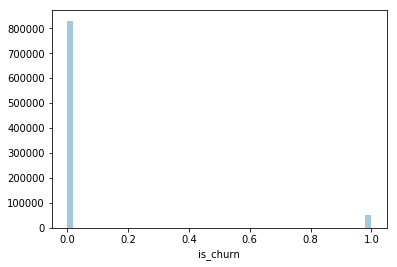

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.distplot(df_0.is_churn,kde=False)
plt.show()

# sample do not change distribution

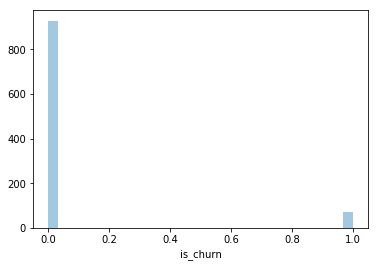

In [22]:
sample_from_df_0 = df_0.sample(n = 1000)
ax = sns.distplot(sample_from_df_0.is_churn,kde=False)
plt.show()

In [7]:
sample_from_df_0[['is_churn']].describe().ix['mean'][0]

0.059999999999999998

In [28]:
sample_from_df_0[sample_from_df_0.is_churn == 0].shape[0] * 0.058748423850431344

54.518537333200285

In [29]:
sample_from_df_0[sample_from_df_0.is_churn == 1].shape[0]

72

# pie chart

In [66]:
df_0[['is_churn']].describe().ix['mean'][0]

0.058748423850431344

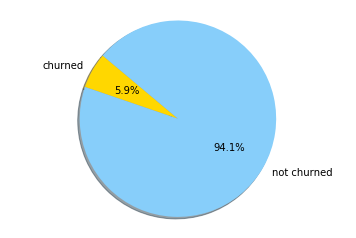

In [69]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['churned', 'not churned']
sizes = [df_0[['is_churn']].describe().ix['mean'][0], 1 - df_0[['is_churn']].describe().ix['mean'][0]]
colors = ['gold','lightskyblue']
#explode = (0.2, 0)  # explode 1st slice # 凸顯第一名
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# distribution training set (w = 1)

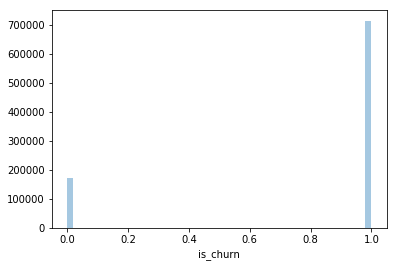

In [21]:
ax = sns.distplot(df_1.is_churn,kde=False)
plt.show()

In [11]:
df_1[df_1.is_churn == 0].shape

(170935, 653)

In [34]:
n_churned = df_1[df_1.is_churn == 0].shape[0]* 0.058748423850431344 
print('n_churned',int(n_churned))
df = pd.concat([df_1[df_1.is_churn == 0],
                df_1[df_1.is_churn == 1].sample(n = int(n_churned), random_state =72)
               ], ignore_index=True)

n_churned 10042


In [37]:
print (df.shape)
df[['is_churn']].describe().ix['mean'][0]

(180977, 653)


0.055487713908397199

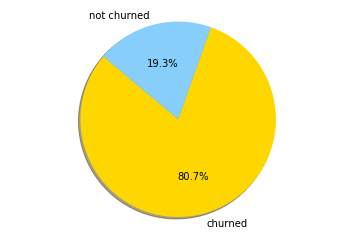

In [70]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['churned', 'not churned']
sizes = [df_1[['is_churn']].describe().ix['mean'][0], 1 - df_1[['is_churn']].describe().ix['mean'][0]]
colors = ['gold','lightskyblue']
#explode = (0.2, 0)  # explode 1st slice # 凸顯第一名
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

# distribution training set (w = 2)

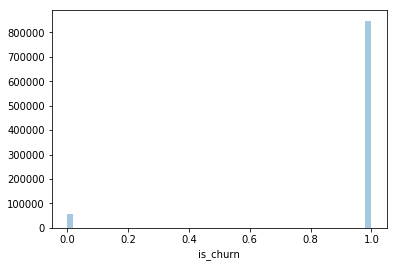

In [22]:
ax = sns.distplot(df_2.is_churn,kde=False)
plt.show()

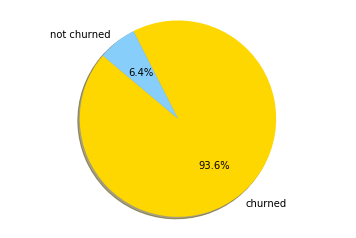

In [71]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['churned', 'not churned']
sizes = [df_2[['is_churn']].describe().ix['mean'][0], 1 - df_2[['is_churn']].describe().ix['mean'][0]]
colors = ['gold','lightskyblue']
#explode = (0.2, 0)  # explode 1st slice # 凸顯第一名
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()